<a href="https://colab.research.google.com/github/saavedramarcosdavid/Aprendizaje-de-Maquina/blob/main/Clase1/Clase_1_Cuarteto_de_Ascombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje de máquina - Clase 1


## Problema: Cuarteto de Ascombe

Supongamos que tenemos cuatro nuevos datos ([16,8]; [8,6]; [16,10] y [16,6]) y
sabemos que cada uno corresponde a un único dataset. Sin embargo, los
parámetros estadísticos de los cuatro datasets son idénticos. Cómo
determinar entonces a qué dataset corresponde cada punto?

<hr>

En principio mi propuesta es visualizar los conjuntos de datos por separado para comprobar si los nuevos datos visualmente tienen una mejor correspondencia.

En segundo lugar, se analizarán los parámetros estadisticos luego de la inclusión de cada dato nuevo al conjunto inicial, especialmente aquellos que determinan la uniformidad y correlación de los datos, con el fin de encontrar un cambio favorable en alguno de sus conjuntos.

<hr>

*Actualización 1:* Dado que al observar los resultados obtenidos al incorporar cada dato nuevo, algunos de los puntos fueron clasificables de manera visual, los parámetros estadísticos de los conjuntos seguían siendo idénticos. 

Por eso se incorporó una medida de distancia entre el nuevo dato y cada uno de los puntos del conjunto analizado, con el fin de identificar cuál es el más indicado.

<hr>

*Actualización 2:* A pesar de que la solución anterioriormente planteada pareciera resolver el problema, presentaría ciertas incertezas ante la presencia de ruido en los datos de un conjunto, puesto que el dato nuevo podría estar muy cerca de alguno de ellos y no significaría que tiene mayor concordancia con el conjunto analizado.

Ante esto, se ha incorporado una nueva medida de distancia la cual considera la distancia promedio a todos los elementos del conjunto de datos, en lugar de al punto más cercano. De esta manera, se podría ver una medida de "parecido" al conjunto entero.

<hr>

*Actualización 3:* Tras observar los resultados anteriores se concluyó que los valores atípicos podrían estar interfiriendo en el cálculo de parámetros y distancias. 

Por ello, se eliminaron los valores atípicos para analizar los parámetros estadísticos. 

Además se agregó un criterio de distancia (la menor distancia a la recta de regresión lineal dado que ahora la recta sería distinta al no poseer valores atípicos), aunque no arrojó resultados satisfactorios, dada la no linealidad de algunos de los conjuntos. 

<hr>

*Actualización 4:* Dado que el último resultado no fue el esperado, se planteó utilizar un criterio basado en una suma ponderada de las distancias anteriormente calculadas por los criterios propuestos, teniendo en cuenta el coeficiente de correlación lineal. Además, se mantuvo la eliminación de atípicos. 

## Implementación

###Importación de librerías

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

###Funciones para la visualización de los datasets


Se incluye el cálculo e impresión de los parámetros estadísticos y la impresión de un dato nuevo pasado por parámetro

*Actualización 1:* se incorporó la evaluación de la distancia de un punto nuevo a cada uno de los puntos ya presentes en el Cuarteto de Ascombe.

*Actualización 2:* se incorpora una nueva medida de distancia (distancia promedio del punto nuevo a los restantes). Para eso la funciones ofrecen la posibilidad de elección de criterio de distancia

*Actualización 3:* se agregó un nuevo criterio de distancia, la menor distancia a la recta de regresión lineal. 

*Actualización 4:* incorporación de un ultimo criterio de distancia que tiene en cuenta las distancias de los criterios anteriores y el coeficiente de correlación lineal

In [5]:
def print_dataset(ax, dataset_name, dataset, dato_nuevo = None, criterio = None):
    '''
        print_dataset
            Grafica los puntos de un dataset en el AxesSubplot recibido por parámetro
            Muestra parámetros estadisticos y considera la inclusión de un dato nuevo.

        Parámetros:
            ax: AxesSubplot correspondiente al gráfico a realizar
            dataset_name: nombre del dataset ('I', 'II', 'III', 'IV')
            dataset: puntos correspondientes junto al color de impresión (x, y, color)
            dato_nuevo: (opcional) dato nuevo a incluir en el conjunto
            criterio: (opcional) selección criterio de distancia 
                    (0 distancia minima, 1 distancia promedio, 
                    2 distancia a la regresion lineal, 3 suma ponderada de distancias)
        Devuelve: 
            None si no se seleccionó ningun criterio
            Valor de la medida de distancia obtenida
    '''
    if (not criterio is None and dato_nuevo is None):
        raise AssertionError("Si selecciona un criterio de distancia debe enviar un dato_nuevo")

    label = dataset_name
    x = dataset[0]
    y = dataset[1]
    color = dataset[2]

    # Configuración del gráfico
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.set_xlabel("x")
    if label=='I':
        ax.set_ylabel("y")
    
    # Grafica de los puntos del grupo del Cuarteto de Ascombe correspondiente
    ax.plot(x, y, 'o', color=color, alpha=.8)

    # Grafico de la recta de regresión lineal
    coeffs = np.polyfit(x, y, deg=1)
    x_index = [i for i in range(25)]
    line = np.polyval(coeffs, x_index)
    ax.plot(x_index,line,'--',color='orange') 

    # Si hay dato nuevo lo incorpora al grafico y al conjunto
    if dato_nuevo != None:
        # Grafico del dato nuevo
        ax.plot(dato_nuevo[0], dato_nuevo[1], 'o', color='r', markersize=10)

        if criterio != None:
            # Calculo de distancias
            dist = 0
            dist_min = np.inf
            dist_mean = 0
            for i in range(x.shape[0]):
                dist = np.sqrt((x[i] - dato_nuevo[0])**2 + (y[i] - dato_nuevo[1])**2)
                dist_mean += dist
                if dist < dist_min:
                    dist_min = dist
            dist_mean = dist_mean/x.shape[0]
            dist_line = np.abs(np.polyval(coeffs, dato_nuevo[0]) - dato_nuevo[1])

            # Se guarda el valor de la distancia seleccionada
            if criterio == 0:
                dist_criterio = dist_min
            elif criterio == 1:
                dist_criterio = dist_mean
            elif criterio == 2: 
                dist_criterio = dist_line
            elif criterio == 3:
                dist_criterio = (0.5*dist_min + 0.25*dist_mean)
            else:
                raise AssertionError("Debe seleccionar un criterio válido (0,1,2,3)")
        
        # Incorporación del punto al conjunto
        x = np.append(x,np.array(dato_nuevo[0]))
        y = np.append(y,np.array(dato_nuevo[1]))

    # Visualización en el gráfico de parámetros estadísticos
    stats = (f'$\\mu_x$ = {np.mean(x):.2f}\n'
             f'$\\mu_y$ = {np.mean(y):.2f}\n'
             f'$\\sigma_x^2$ = {np.var(x, ddof=1):.3f}\n'
             f'$\\sigma_y^2$ = {np.var(y, ddof=1):.3f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.3f}\n'
             f'$R^2$ = {r2_score(y, np.polyval(coeffs, x)):.2f}\n'
             f'Lin = {coeffs[0]:.1f}x + {coeffs[1]:.1f}')
    
    if criterio != None:
        if criterio == 3:
            # calcula r con el dato incluido con el fin de considerar correlación lineal
            dist_criterio += 0.25*(1-np.corrcoef(x, y)[0][1])*dist_line 
        # Se muestra también la distancia mínima
        stats += f"\nDist. min = {dist_criterio:.2f}"

    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.4)
    ax.text(0.95, 0.07, stats, fontsize=13, bbox=bbox, transform=ax.transAxes, horizontalalignment='right')

    if criterio != None: # Si se seleccionó un criterio se devuelve la distancia perdida
        return dist_criterio
    else:
        return None
    
def print_datasets(datasets, dato_nuevo = None, criterio = None):
    '''
        print_datasets
            Grafica los conjuntos de datos de Ascombe junto a sus parametros estadísticos.
            Considera la inclusión de un dato nuevo.

        Parámetros:
            datasets: diccionario con los conjuntos del Cuarteto de Ascombe
            dato_nuevo: (opcional) dato nuevo a incluir en el conjunto
            criterio: (opcional) selección criterio de distancia 
                    (0 distancia minima, 1 distancia promedio, 
                    2 distancia a la regresion lineal, 3 suma ponderada de distancias)
    '''
    if (not criterio is None and dato_nuevo is None):
        raise AssertionError("Si selecciona un criterio de distancia debe enviar un dato_nuevo")

    # Configuración de la figura a mostrar
    fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(21, 5),
                            gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
    axs[0].set(xlim=(0, 20), ylim=(2, 14))
    axs[0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

    # Grafico de los conjuntos de datos del Cuarteto de Ascombe
    dist = 0
    dist_min = np.inf
    dataset_dist_min = 'I'
    for ax, dataset_name in zip(axs.flat, list(datasets)):
        dist = print_dataset(ax, dataset_name, datasets[dataset_name], dato_nuevo, criterio)
        if not dato_nuevo is None and not dist is None and dist<dist_min:
            # Si se seleccionó distancia y dato nuevo, se busca la distancia mínima
            dist_min = dist
            dataset_dist_min = dataset_name
        
    if not criterio is None:
        titulo = f"El dato {dato_nuevo} es probable que corresponda al conjunto {dataset_dist_min}"
    else:
        titulo = "Cuarteto de Ascombe"

    fig.suptitle(titulo, fontsize=16)
    plt.show()

###Cuarteto de Ascombe
Cargado de los datos y visualización de los mismos

*Nota: se puede observar que los parámetros estadísticos son idénticos*

In [6]:
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

x3 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

datasets = {
    'I': (x1, y1, 'c'),
    'II': (x2, y2, 'm'),
    'III': (x3, y3, 'g'),
    'IV': (x4, y4, 'b')
}

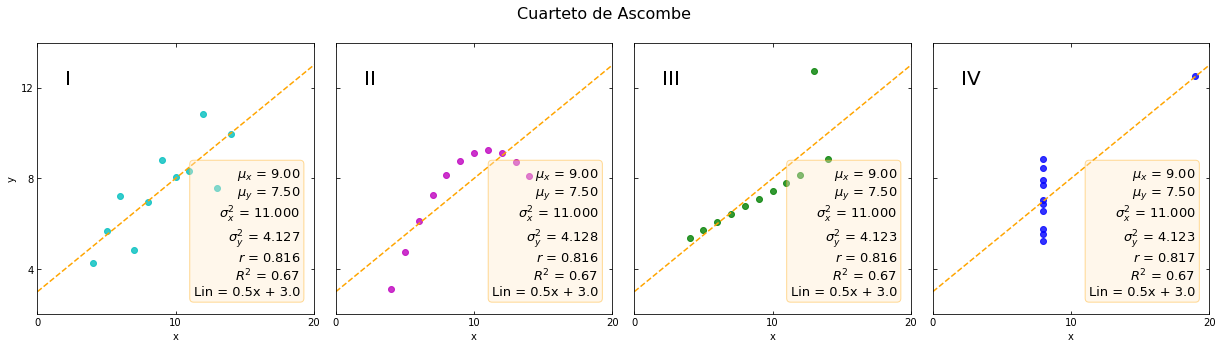

In [7]:
print_datasets(datasets)

### Posibles soluciones
En esta sección se muestra lo que sucede al incorporar un dato nuevo a cada conjunto de datos utilizando las distintas técnicas implementadas

#### Evaluación utilizando la distancia mínima
En esta técnica se buscó asignar un conjunto de datos para cada dato nuevo a partir de encontrar la distancia más corta entre el punto nuevo en consideración y el punto más cercano dentro del conjunto

#####Dato: [16,8]
Visualmente pareciera que este dato corresponde al conjunto de datos I o II, pero se determina el II dado que se encuentra más cercano a uno de sus puntos

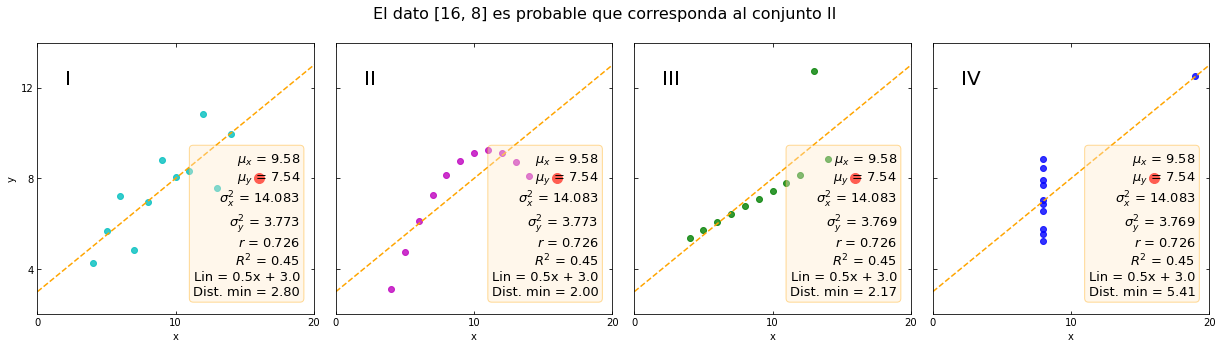

In [8]:
print_datasets(datasets, [16,8], criterio = 0)

#####Dato: [8,6]
Claramente, en este caso el dato corresponde al conjunto IV puesto que se encuentra en la línea vertical que forman sus datos

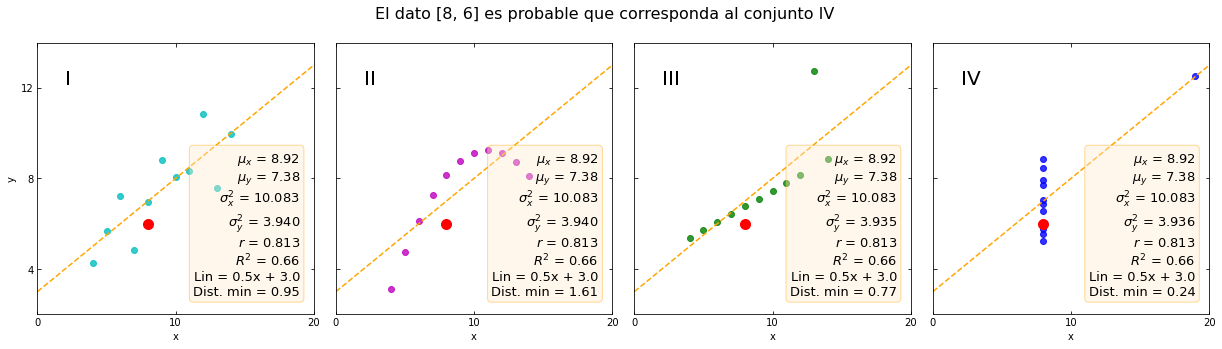

In [9]:
print_datasets(datasets, [8,6], criterio = 0)

#####Dato: [16,10]
Si bien en este caso, se ha determinado la correspondencia del dato con el conjunto de datos I por mayor cercanía al punto más a la derecha en la imagen, también podría considerarse el conjunto III por la forma (lineal) que mantienen los datos

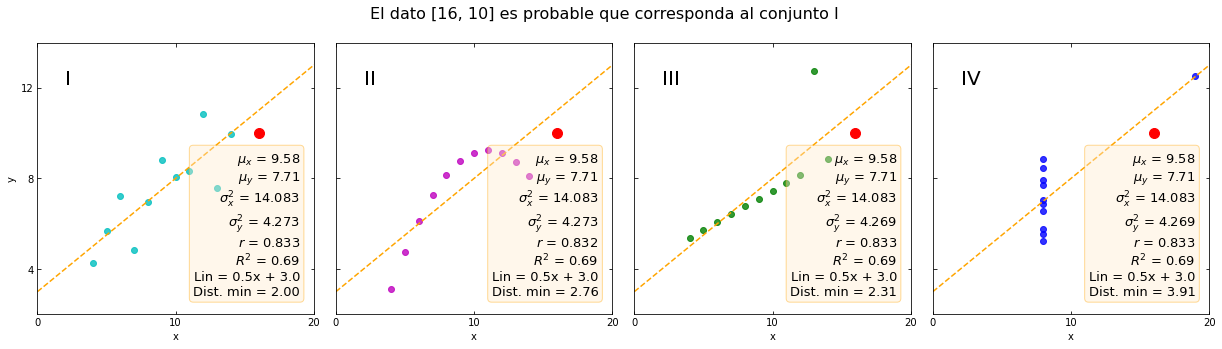

In [10]:
print_datasets(datasets, [16,10], criterio = 0)

#####Dato: [16,6]
En este caso, se puede ver que el punto nuevo acompaña la trayectoria que forman los puntos del conjunto II

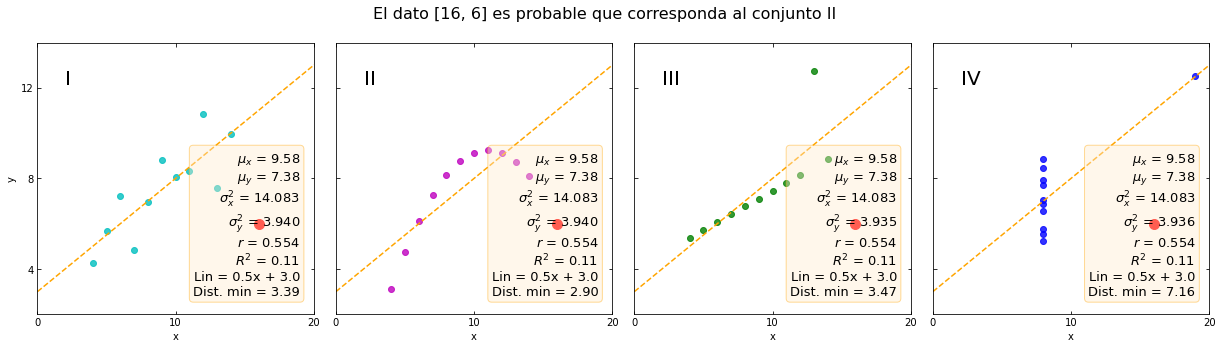

In [11]:
print_datasets(datasets, [16,6], criterio = 0)

#### Evaluación utilizando la distancia promedio
En esta técnica se buscó asignar un conjunto de datos para cada dato nuevo a partir de encontrar la distancia promedio entre el punto nuevo en consideración y todos los puntos dentro del conjunto

#####Dato: [16,8]
Nuevamente se ha seleccionado el conjunto II dado que en promedio se encuentra más próximo a todos los puntos de dicho conjunto en comparación a los demás.

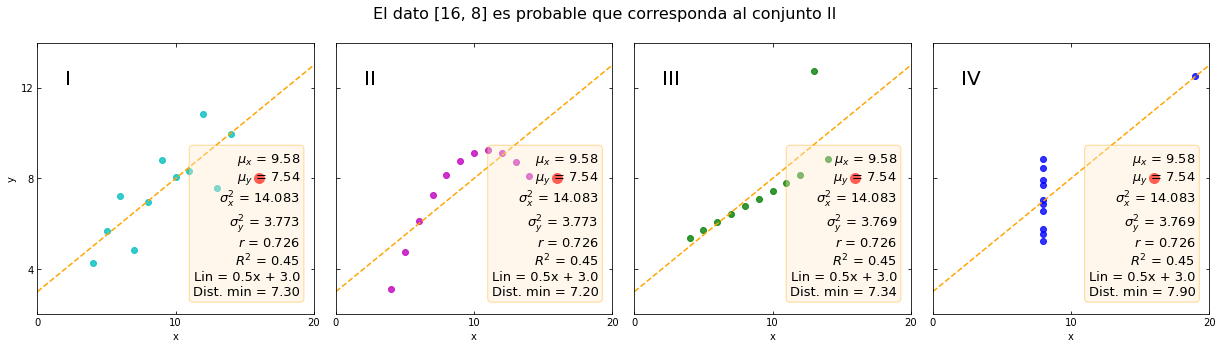

In [12]:
print_datasets(datasets, [16,8], criterio = 1)

#####Dato: [8,6]
No hay dudas que este punto se encuentra mejor ubicado en el conjunto IV, La distancia promedio es menor dado que sus puntos se encuentran muy próximos. Aunque podría existir un problema si el punto lejano se encontrase muy distanciado moviendo mucho la media. 

*Nota:* esta conclusión me ha llevado a pensar que los valores extremos representan un problema.

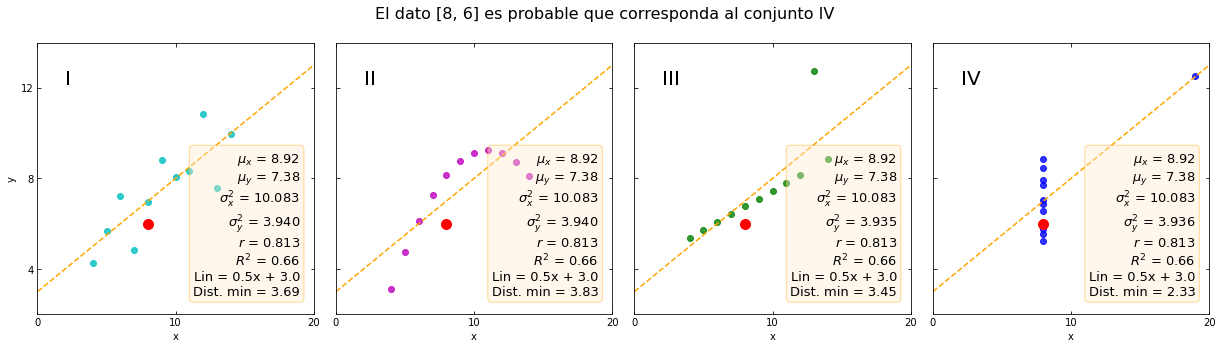

In [13]:
print_datasets(datasets, [8,6], criterio = 1)

#####Dato: [16,10]
Dada la forma de curva que presenta el conjunto II, provoca que los puntos del "vértice superior" se encuentren muy próximos al punto analizado, pese a que se podría señalar visualmente que el dato pertenece al conjunto I o III.

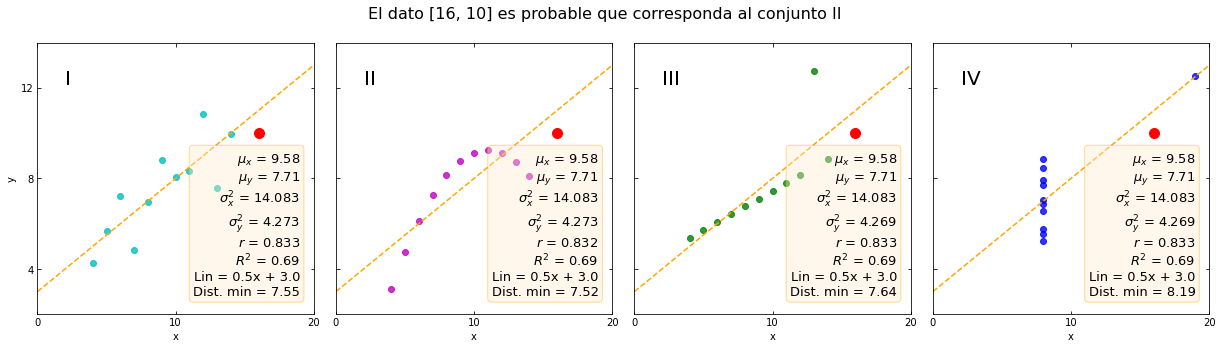

In [14]:
print_datasets(datasets, [16,10], criterio = 1)

#####Dato: [16,6]
Nuevamente el conjunto seleccionado es el II, aunque en este caso es el más acertado dada la continuación de la curva visible

*Nota:* La repetición de la elección del conjunto II me hace pensar que esta técnica aunque resultaba muy "coherente" no arroja los mejores resultados.

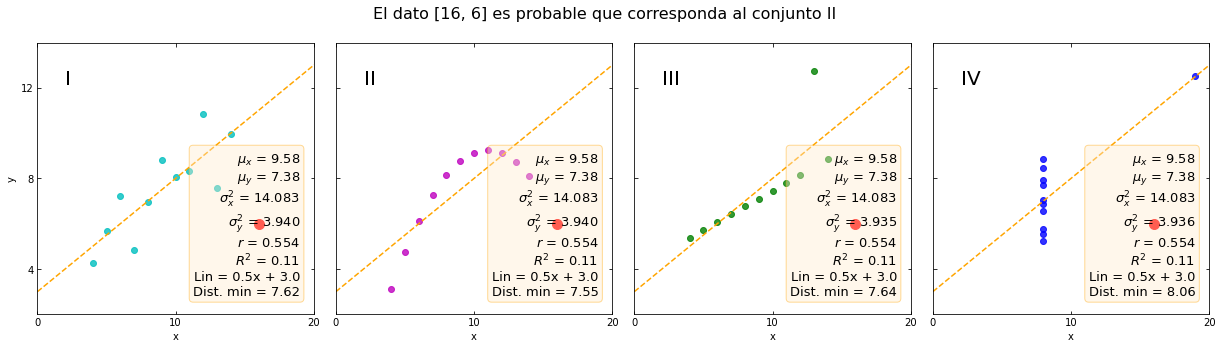

In [15]:
print_datasets(datasets, [16,6], criterio = 1)

#### Eliminando los valores atipicos

Ante las observaciones realizadas utilizando las técnicas anteriores, se ha llegado a la conclusión de que resultaria interesante descartar valores atipicos antes de calcular los parámetros estadísticos

Método utilizado: calculando *Q25-Q75* __rango intercuartil(IR)__. Señalando como valores atípicos los datos que estén a más de $ k * IR $ unidades de *Q25* y *Q75*:  

##### Función para la visualización y eliminación de valores atípicos

In [16]:
import seaborn as sns
from scipy.stats import norm

def plot_normal(mean, std, color="black"):
    '''
        plot_normal
            Grafica la distribución normal según media y desvío estándar pasado por parámetros

        Parámetros:
            mean: media
            std: desvío estándar
            color: color de la línea elegida
    '''
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)

def eliminar_atipicos(x, y):
    '''
        eliminar_atipicos
            Dado el par de datos formados por cada elemento del vector x y su 
            compañero en el vector y, se buscan los valores atípicos (en y) y se
            eliminan de ambos vectores (eliminación de puntos).
    '''
    # Calcular rango intercuartil
    y_df = pd.DataFrame({'y': y})

    q25, q75 = np.percentile(y_df['y'], 25), np.percentile(y_df['y'], 75)
    iqr = q75 - q25

    # Calcule el rango de valores atípicos
    k = 1.5
    range_ir = iqr * k

    # Límites
    lower_bound_ir, upper_bound_ir = q25 - range_ir, q75 + range_ir

    # Creacion de mascaras y busqueda de atípicos y no atípicos
    outliers_mask_ir = [True if x < lower_bound_ir or x > upper_bound_ir else False for x in y_df['y']]
    no_outliers_mask_ir = [False if x < lower_bound_ir or x > upper_bound_ir else True for x in y_df['y']]

    outliers = y_df['y'][outliers_mask_ir]
    no_outliers = y_df['y'][no_outliers_mask_ir]

    # Histograma de distribución y valores atípicos en naranja
    plt.figure(figsize=(10,4))
    ax1=plt.subplot(1, 2, 1)

    sns.histplot(y_df['y'], label="100% Equities", kde=False, stat="density", linewidth=0)
    plot_normal(y_df['y'].mean(), y_df['y'].std())

    for outlier in outliers:
        plt.axvline(outlier, 0, y_df['y'].max(), color = '#FF7F0E')
    
    # Diagrama de cajas del conjunto de datos
    ax2=plt.subplot(1, 2, 2)
    sns.boxplot(x=y_df['y'], whis=k, ax = ax2)

    # Se devuelven los vectores x e y sin atípicos
    return x[no_outliers_mask_ir],y[no_outliers_mask_ir]

##### Eliminación y visualización de atípicos del Cuarteto de Ascombe

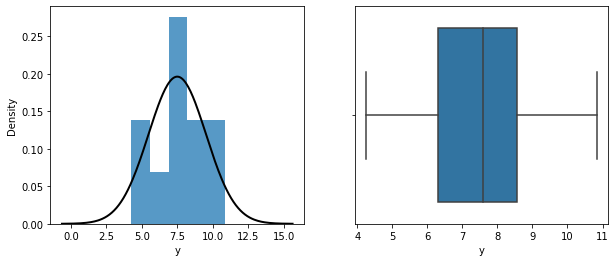

In [17]:
x1, y1 = eliminar_atipicos(x1, y1)

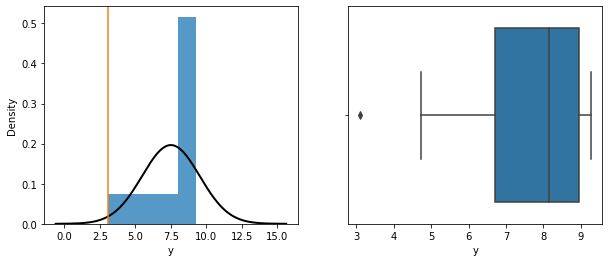

In [18]:
x2, y2 = eliminar_atipicos(x2, y2)

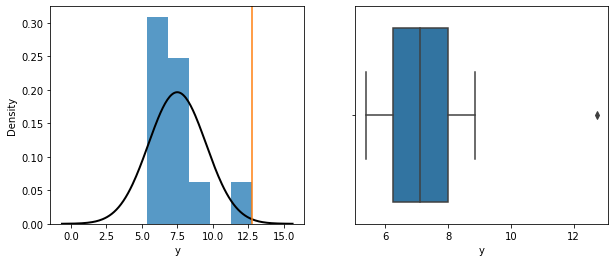

In [19]:
x3, y3 = eliminar_atipicos(x3, y3)

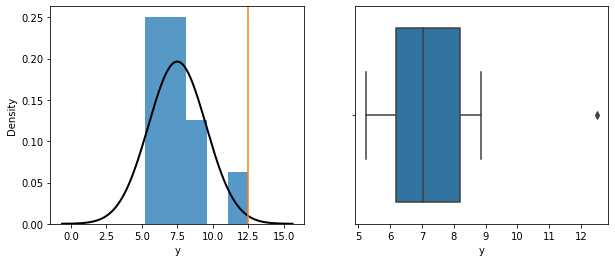

In [20]:
x4, y4 = eliminar_atipicos(x4, y4)

##### Recalcular los parámetros estadísticos

Al observar los resultados obtenidos es posible concluir que si lo que se busca es determinar la pertenencia de cada dato nuevo a partir de su regresión lineal, puede que no sea lo más adecuado dado que no todos los conjuntos tienen una disposición lineal de sus datos.

* I es aparentemente lineal según su correlación lineal.
* II no tiene una disposición lineal, más bien parabólica.
* III es perfectamente lineal.
* IV no es posible encontrar la recta dado que se produce una división por 0 en ejecución.

Podría analizarse realizar distintas regresiones dependiendo el conjunto de datos para luego comparar la inclusión de un dato y posterior clasificación. El problema es que en este contexto es posible visualizarlos en un mismo gráfico, pero en otro, podría no ser así (si se tienen más de 3 variables). 

De todas formas, en las secciones siguientes se analizarán los parámetros estadísticos al ingresar un dato nuevo, con el fin de encontrar una mayor "robustez" en los mismos, junto con la distancia a la recta de regresión lineal.

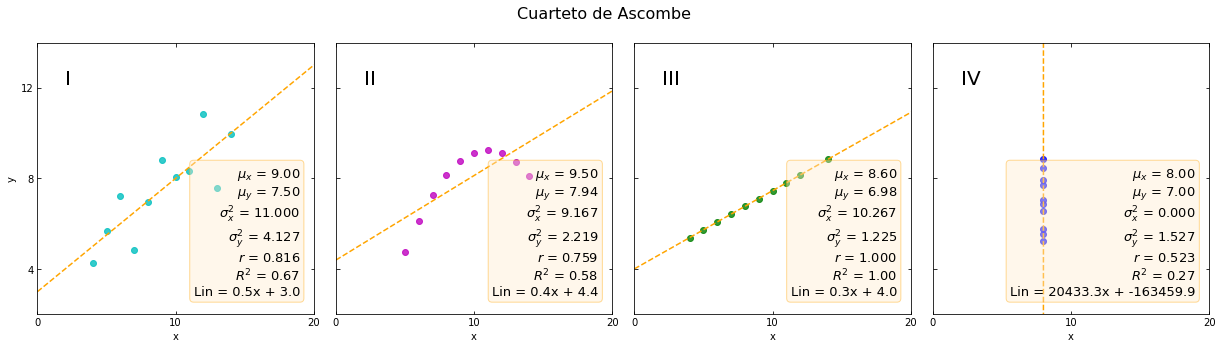

In [21]:
x4 = np.array([x4[i]+0.0001 if y4[i]==y4.max() else x4[i] for i in range(x4.shape[0])]) # Para no provocar división por 0
datasets = {
    'I': (x1, y1, 'c'),
    'II': (x2, y2, 'm'),
    'III': (x3, y3, 'g'),
    'IV': (x4, y4, 'b')
}
print_datasets(datasets)

#####Dato: [16,8]
En este caso si vemos tanto la recta como el coeficiente de correlación lineal, podemos ver que el punto "encaja mejor" en el conjunto III 

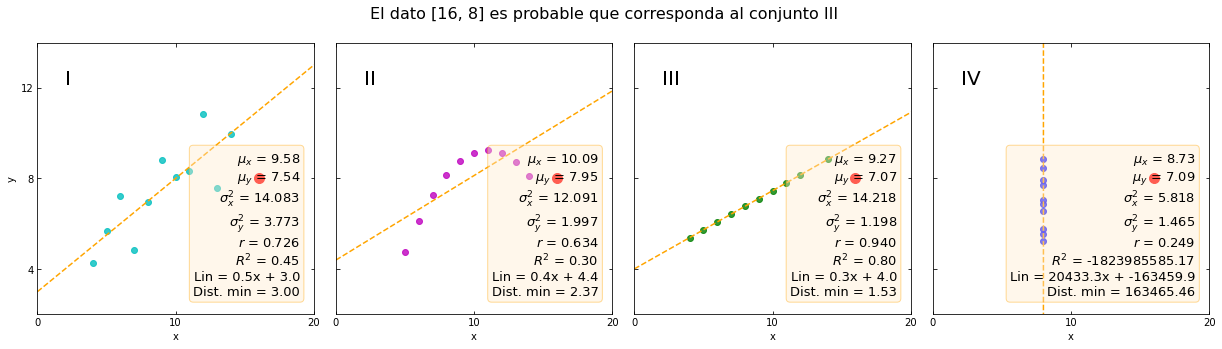

In [22]:
print_datasets(datasets, [16,8], criterio = 2)

#####Dato: [8,6]
Aquí se produce una incoherencia porque si miramos los datos en el gráfico, el punto rojo se ubica mejor en el conjunto IV, sin embargo, los parámetros muestran que el conjunto que debería seleccionarse es el III. Esto es porque el IV no presenta buenos parametros en cuanto a la regresión lineal y correlacion entre *x* e *y* (*y* no depende de *x*, dado que para un mismo *x*, existen muchos puntos en *y*).

Además la distancia a la recta en III es menor, y al ser el criterio de decisión se asigna esta.


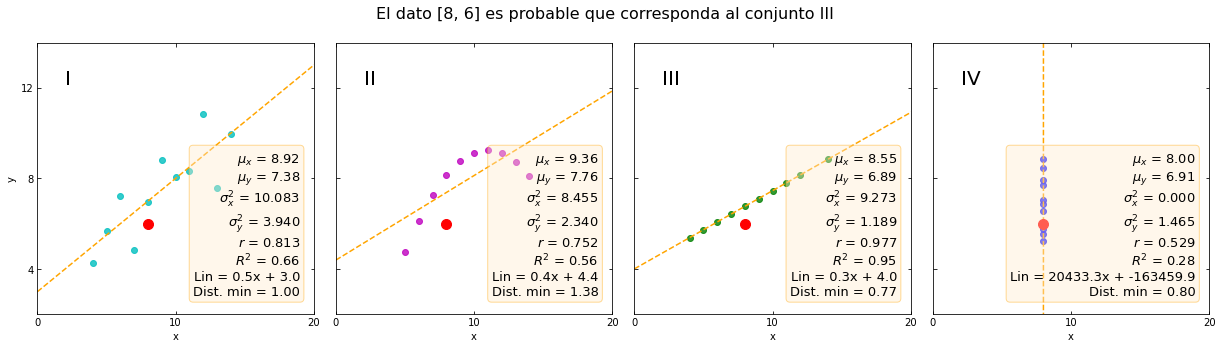

In [23]:
print_datasets(datasets, [8,6], criterio = 2)

#####Dato: [16,10]
Nuevamente se presenta una incoherencia que demuestra qué la regresión lineal para el caso del conjunto II no es acertada, dado que el punto no se encuentra cerca de los datos pero si de la recta de regresión lineal, seleccionando dicho conjunto. 

De todas formas, si se presta atención a los coeficientes de correlacion lineal y de determinación, se puede ver que el punto hace mucho más robusto al conjunto III puesto que dichos coeficientes se mantienen elevados.

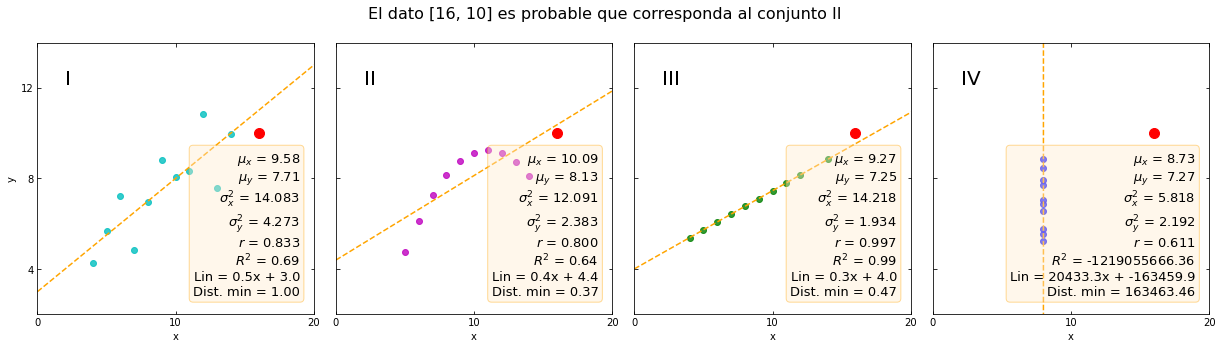

In [24]:
print_datasets(datasets, [16,10], criterio = 2)

#####Dato: [16,6]
Para este punto, al utilizar la regresión lineal se selecciona el conjunto III, dado que tiene la menor distancia a la recta, además mejor valor de coeficiente de correlación lineal. Aunque es observable que corresponde al conjunto de datos II dado que sigue la trayectoria de puntos.

La no linealidad del conjunto II, en cierto punto, invalida las conclusiones que se pueden realizar a partir de la correlación y regresión lineal.

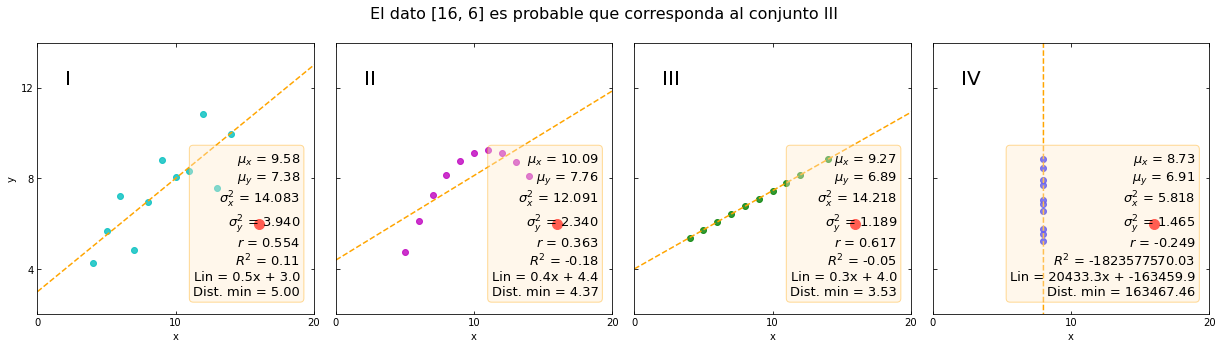

In [25]:
print_datasets(datasets, [16,6], criterio = 2)

#### Suma ponderada de distancias
Al ver que los métodos anteriormente planteados tienen sus falencias, se ha optado por probar un nuevo criterio de selección de conjunto de datos que tenga en cuenta las anteriores medidas de distancia calculadas, simultáneamente. Cabe destacar que se manejará el Cuarteto de Ascombe sin los valores atípicos, dado que estos podrían estar interfiriendo en las conclusiones.

Se ha realizado una suma ponderada de las distancias en base a los resultados obtenidos, en el cual se da mucha importancia a la distancia del punto más cercano, 0.5 del valor final dado que al no tener valores atípicos solo podría estar influenciado negativamente por ruido, de lo contrario, la cercanía a los puntos preexistentes es una muy buena aproximación. Unos 0.25 para la distancia promedio a todos los puntos y hasta 0.25 de la distancia a la recta de regresión lineal en la posición x requerida.

Cabe aclarar que se ha incorporado la consideración del coeficiente de correlación lineal al momento de darle peso a la distancia a la recta con el fin de que si la correlación lineal es adecuada, se considere dicha distancia. Esto produce una desestimación en casos en los que la correlación lineal es debil.

#####Dato: [16,8]

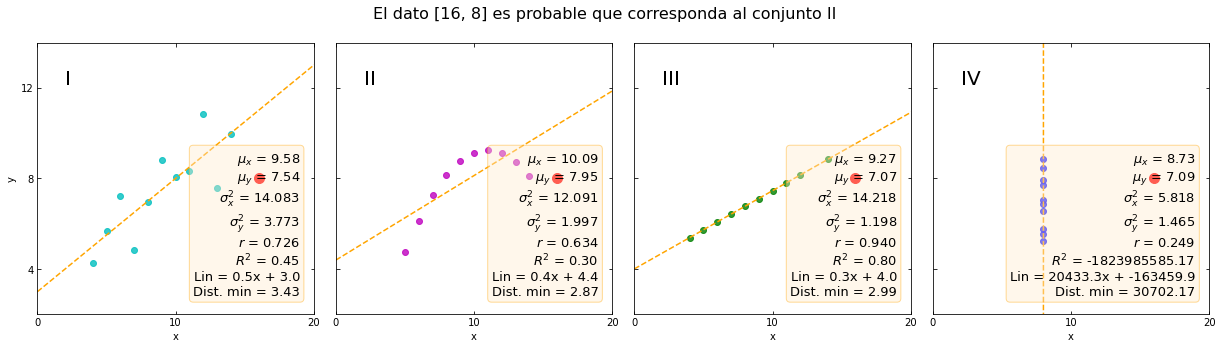

In [26]:
print_datasets(datasets, [16,8], criterio = 3)

#####Dato: [8,6]

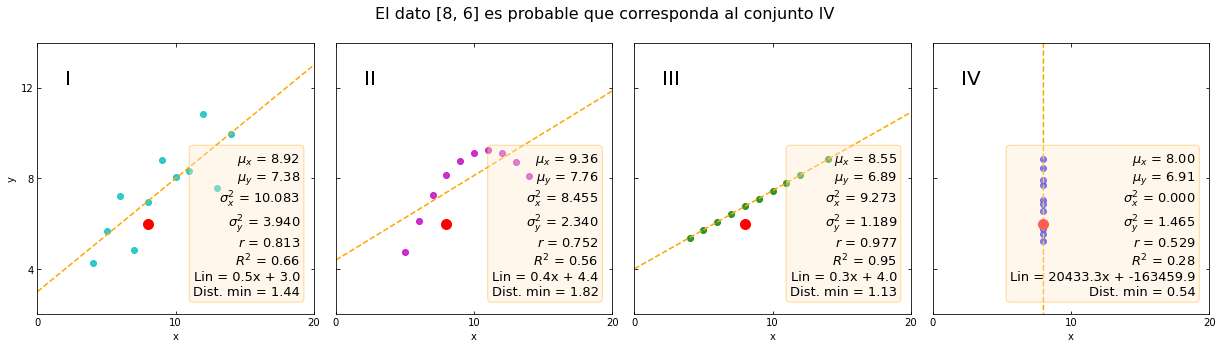

In [27]:
print_datasets(datasets, [8,6], criterio = 3)

#####Dato: [16,10]

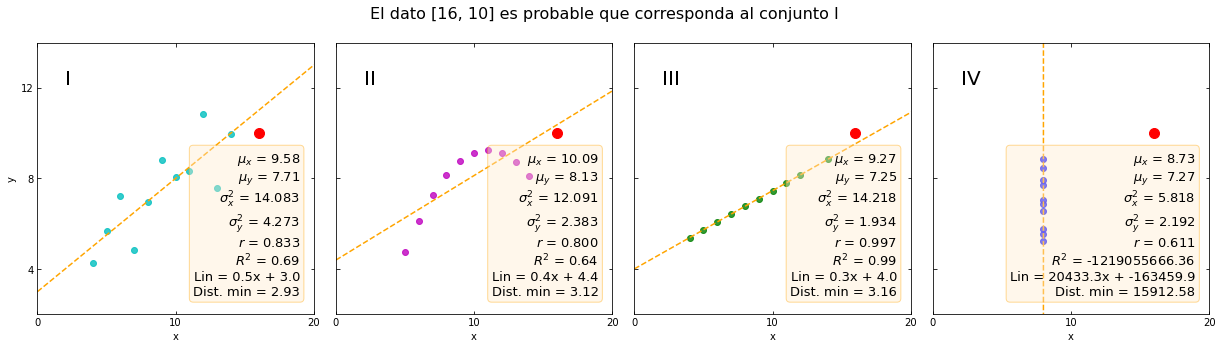

In [28]:
print_datasets(datasets, [16,10], criterio = 3)

#####Dato: [16,6]

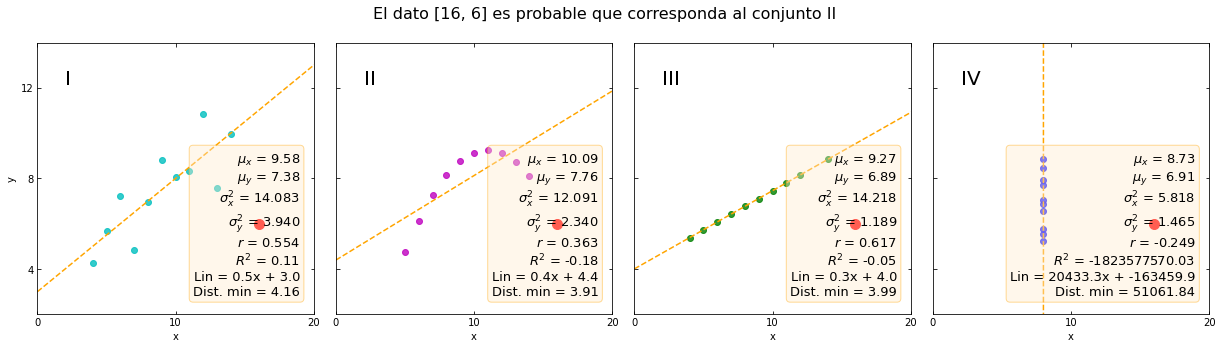

In [29]:
print_datasets(datasets, [16,6], criterio = 3)

## Conclusiones

En este cuaderno, se ha analizado la incorporación de diversos datos en los conjuntos del Cuarteto de Ascombe y su posible clasificación en alguno de ellos. Para lograrlo, se plantearon 4 implementaciones de solución. Sin embargo, no se ha preferido una de ellas por sobre el resto, puesto que los criterios de selección probados ofrecen distintos resultados, en algunos casos correctos y contradictorios.

Cabe aclarar que los conjuntos de datos analizados a pesar de mostrar claras diferencias visuales, presentan parámetros estadísticos idénticos o extremadamente similares. Por lo que resulta complejo analizarlos con herramientas más bien clásicas. 

Es interesante el hecho de que la correlación y regresión lineal no siempre resulta útil. Esto último queda demostrado en la clasificación de puntos cercanos a la recta de regresión lineal del conjunto II, dado que sus puntos no se encuentran ordenados linealmente. 

Por último se destaca la gran importancia de la visualización de los datos en el trabajo de la ciencia y análisis de datos.